# Практическое задание 1

# Ранжирование вопросов StackOverflow с помощью векторных представлений слов

## курс "Математические методы анализа текстов"


### ФИО: Каратыщев Дмирий Иванович


## Введение

В этом задании вы научитесь вычислять близость текстов и применить этот метод для поиска похожих вопросов на [StackOverflow](https://stackoverflow.com).

### Используемые библиотеки

В данном задании потребуются следующие библиотеки:
- [Gensim](https://radimrehurek.com/gensim/) — инструмент для решения различных задач NLP (тематическое моделирование, представление текстов, ...).
- [Numpy](http://www.numpy.org) — библиотека для научных вычислений.
- [scikit-learn](http://scikit-learn.org/stable/index.html) — библилиотека с многими реализованными алгоритмами машинного обучения для анализа данных.
- [Nltk](http://www.nltk.org) — инструмент для работы с естественными языками.
- [Pytorch](https://pytorch.org/) — инструмент для обучения нейросетей.


### Данные

Данные лежат в архиве `StackOverflowData.zip`, который состоит из:
- `train.tsv` - обучающая выборка. В каждой строке через табуляцию записаны дублирующие друг друга предложения;
- `test.tsv` - тестовая выборка. В каждой строке через табуляцию записаны: *<вопрос>, <похожий вопрос>, <отрицательный пример 1>, <отрицательный пример 2>, ...*

Скачать архив можно здесь: [ссылка на google диск](https://drive.google.com/open?id=1QqT4D0EoqJTy7v9VrNCYD-m964XZFR7_)

#### Скачивание файлов

In [1]:
! conda install -y gdown

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - nodefaults
 - conda-forge
 - defaults
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.9.1               |  py310hff52083_0         894 KB  conda-forge
    filelock-3.16.1            |     pyhd8ed1ab_0          17 KB  conda-forge
    gdown-5.2.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         932 KB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.16.1-pyhd8ed1ab_0 
  gdown              conda-forge/noarch::gdown-5.2.0-pyhd8ed1ab_0 

The following packages will be UPDATED:



In [2]:
# from google.colab import drive
# drive.mount('/content/MyDrive')

# FOR KAGGLE
!gdown --id 1KxXJXT2xYyuzRSg-SeqNjlUdxZyHqOfO # validation.csv
!gdown --id 1UMnoqJoXZFRClC5lMj6tJoErCcSgCJG_ # train.tsv
!gdown --id 18EUiMpyq6zPSmWhXCJ5pP47SyYqS6MAt # test.tsv
!gdown --id 1n92gnIqZoHvUJKxIaR-oHvgdMwhjWySs # test_gt.json
!gdown --id 111846F7uC7mFxd_cjqIIAS67aT2rVCKa # download_utils.py

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1KxXJXT2xYyuzRSg-SeqNjlUdxZyHqOfO
From (redirected): https://drive.google.com/uc?id=1KxXJXT2xYyuzRSg-SeqNjlUdxZyHqOfO&confirm=t&uuid=5d0bd0e8-4e29-4d24-ae73-945981f85ef2
To: /kaggle/working/validation.tsv
100%|████████████████████████████████████████| 201M/201M [00:02<00:00, 70.8MB/s]
/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1UMnoqJoXZFRClC5lMj6tJoErCcSgCJG_
From (redirected): https://drive.google.com/uc?id=1UMnoqJoXZFRClC5lMj6tJoErCcSgCJG_&confirm=t&uuid=8c8319aa-6d1a

In [ ]:
# !cp /content/MyDrive/MyDrive/Data/StackOverflow/validation.tsv /content/

In [ ]:
# !cp /content/MyDrive/MyDrive/Data/StackOverflow/train.tsv /content/
# !cp /content/MyDrive/MyDrive/Data/StackOverflow/tests.py /content/
# !cp /content/MyDrive/MyDrive/Data/StackOverflow/test_gt.json /content/
# !cp /content/MyDrive/MyDrive/Data/StackOverflow/download_utils.py /content/

In [3]:
# FOR KAGGLE
BASE_PATH = '/kaggle/working/'

#### Тесты

In [4]:
from tests import TaskTests

task_tests = TaskTests.from_json(path=BASE_PATH + 'test_gt.json')

In [5]:
import torch

In [6]:
x = torch.Tensor([1, 1])

In [7]:
! nvidia-smi

Fri Oct 11 09:00:41 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Вектора слов

Для решения вам потребуются предобученная модель векторных представлений слов. Используйте [модель эмбеддингов](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit), которая была обучена с помощью пакета word2vec на данных Google News (100 миллиардов слов). Модель содержит 300-мерные вектора для 3 миллионов слов и фраз. Вы можете скачать их, запустив блок кода ниже.

In [9]:
from __future__ import print_function

import os
import shutil
import requests


# tqdm utils

class SimpleTqdm():
    def __init__(self, iterable=None, total=None, **kwargs):
        self.iterable = list(iterable) if iterable is not None else None
        self.total = len(self.iterable) if self.iterable is not None else total
        assert self.iterable is not None or self.total is not None
        self.current_step = 0
        self.print_frequency = max(self.total // 50, 1)
        self.desc = ""

    def set_description_str(self, desc):
        self.desc = desc

    def set_description(self, desc):
        self.desc = desc

    def update(self, steps):
        last_print_step = (self.current_step // self.print_frequency) * self.print_frequency
        i = 1
        while last_print_step + i * self.print_frequency <= self.current_step + steps:
            print("*", end='')
            i += 1
        self.current_step += steps

    def close(self):
        print("\n" + self.desc)

    def __iter__(self):
        assert self.iterable is not None
        self.index = 0
        return self

    def __next__(self):
        if self.index < self.total:
            element = self.iterable[self.index]
            self.update(1)
            self.index += 1
            return element
        else:
            self.close()
            raise StopIteration

def tqdm_notebook_failsafe(*args, **kwargs):
    try:
        import tqdm
        tqdm.monitor_interval = 0  # workaround for https://github.com/tqdm/tqdm/issues/481
        return tqdm.tqdm_notebook(*args, **kwargs)
    except:
        # tqdm is broken on Google Colab
        return SimpleTqdm(*args, **kwargs)

#download utils

def download_file(url, file_path):
    r = requests.get(url, stream=True)
    total_size = int(r.headers.get('content-length'))
    if os.path.isfile(file_path) and os.path.getsize(file_path) == total_size:
        print("File was already downloaded")
        return
    try:
        with open(file_path, 'wb', buffering=16*1024*1024) as f:
            bar = tqdm_notebook_failsafe(total=total_size, unit='B', unit_scale=True)
            bar.set_description(os.path.split(file_path)[-1])
            for chunk in r.iter_content(32 * 1024):
                f.write(chunk)
                bar.update(len(chunk))
            bar.close()
    except Exception:
        print("Download failed")
    finally:
        if os.path.getsize(file_path) != total_size:
            os.remove(file_path)
            print("Removed incomplete download")

def download_google_vectors(target_dir='.'):
    print("Downloading GoogleNews-vectors-negative300.bin.gz (1.5G) for you, it will take a while...")
    download_file("https://figshare.com/ndownloader/files/41403483",
                  target_dir + "/GoogleNews-vectors-negative300.bin.gz")

In [10]:
# download_google_vectors(target_dir='.')
download_google_vectors(target_dir=BASE_PATH)

/tmp/ipykernel_30/494624812.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  return tqdm.tqdm_notebook(*args, **kwargs)


  0%|          | 0.00/1.65G [00:00<?, ?B/s]

## Часть 1. Предобученные векторные представления слов (2 балла)

Скачайте предобученные вектора и загрузите их с помощью функции [KeyedVectors.load_word2vec_format](https://radimrehurek.com/gensim/models/keyedvectors.html) библиотеки Gensim с параметром *binary=True*. Если суммарный размер векторов больше, чем доступная память, то вы можете загрузите только часть векторов, указав параметр *limit* (рекомендуемое значение: 500000).

In [11]:
import gensim


wv_embeddings = gensim.models.KeyedVectors.load_word2vec_format(
    BASE_PATH + 'GoogleNews-vectors-negative300.bin.gz', 
    binary=True, limit=500000,)

### Как пользоваться этими векторами?

Как только вы загрузите векторные представления слов в память, убедитесь, что имеете к ним доступ. Сначала вы можете проверить, содержится ли какое-то слово в загруженных эмбедингах:

    'word' in wv_embeddings

Затем, чтобы получить соответствующий вектор, вы можете использовать оператор доступа по ключу:

    wv_embeddings['word']

### Проверим, корректны ли векторные представления

Чтобы предотвратить возможные ошибки во время первого этапа, можно проверить, что загруженные вектора корректны. Для этого проверьте три пункта:
1. Используя метод `.most_similar(positive=..., negative=...)`, найти слово, похожее на `woman`, `king` и непохожее на `man`.
2. Используя метод `.doesnt_match(...)`, найти "белую ворону" в списке `['breakfast, 'dinner', 'lunch', 'cereal']`.
3. Используя метод `.most_similar_to_given(word, [...])`, найти наиболее похожее на `music` слово из списка `['water', 'sound', 'backpack', 'mouse']`.

Прокомментируйте полученные результаты: считаете ли вы их верными и почему.

In [12]:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

print(wv_embeddings.most_similar(positive=['woman', 'king'], negative=['man'])[0][0])
print(wv_embeddings.doesnt_match(['breakfast', 'dinner', 'lunch', 'cereal']))
print(wv_embeddings.most_similar_to_given('music', ['water', 'sound', 'backpack', 'mouse']))

queen
cereal
sound


### Ранжирование вопросов StackOverflow

Давайте посмотрим на данные, которые мы будем использовать в рамках задания. Выборка уже разбита на обучающую и тестовую. Все файлы используют табуляцию в качестве разделителя, но они имеют разный формат:

- *обучающая* выборка (train.tsv) содержит похожие друг на друга предложения в каждой строке;
- *тестовая* выборка (validation.tsv) содержит в каждой строке: *вопрос, похожий вопрос, отрицательный пример 1, отрицательный пример 2, ...*

Считайте тестовую (валидационную) выборку. Ответьте на следующие вопросы:
1. Сколько пар-дубликатов предоставлено в выборке?
2. Сколько в среднем на каждую пару предоставлено отрицательных примеров?

In [13]:
import tqdm


def read_corpus(filename):
    data = []
    for line in open(filename, encoding='utf-8'):
        data.append(line.strip().split('\t'))
    return data

validation = read_corpus(BASE_PATH + 'validation.tsv')

In [14]:

import numpy as np

###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

validation_numpy = np.array(validation, dtype=object)

In [15]:
one_pair_duplicate = 0

for i in range(validation_numpy.shape[0]):
    if validation_numpy[i][0] == validation_numpy[i][1]:
        one_pair_duplicate += 1
print(f'Duplicates inside each pair: {one_pair_duplicate}')

Duplicates inside each pair: 0


In [16]:
pairs = []

for i in range(validation_numpy.shape[0]):
    pairs.append(validation_numpy[i][:2])

pairs = np.array(pairs)
print(pairs.shape)

(3760, 2)


In [17]:
unique_pairs = np.vstack(list({tuple(e) for e in pairs}))
print(f'The amount of unique pairs: {unique_pairs.shape[0]}')

The amount of unique pairs: 3709


In [18]:
num_samples = validation_numpy.shape[0]

In [19]:
amount_of_negatives_per_sample = 0
all_samples = 0
for row in validation_numpy:
    amount_of_negatives_per_sample += len(row[2:])
    all_samples += len(row[2:])
amount_of_negatives_per_sample //= validation_numpy.shape[0]
print(f'The whole amount of samples: {all_samples}')
print(f'The mean amount of negative examples per one pair: {amount_of_negatives_per_sample}')

The whole amount of samples: 3755528
The mean amount of negative examples per one pair: 998


In [20]:
task_tests.test_validation_corpus(
    num_samples,
    amount_of_negatives_per_sample
)

### Векторные представления текста

Чтобы перейти от отдельных слов к векторным представлениям вопросов, предлагается подсчитать **среднее** векторов всех слов в вопросе. Если для какого-то слова нет предобученного вектора, то его нужно пропустить. Если вопрос не содержит ни одного известного слова, то нужно вернуть нулевой вектор.



In [21]:
import numpy as np


class Embedder:

    def __init__(self, embeddings, dim):
        """
            embeddings: word2vec эмбеддинги
            dim: размерность word2vec эмбеддингов. Нужна для задания нулего вектора для пустых вопросов
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.embeddings = embeddings
        self.dim = dim

    def __call__(self, text, normalize=False):
        """
            Принимает на вход текст и преобразует его в вектор.

            text: строка с вопросом
            normalize: при True нужно перед возвращением нормализовать вектор

            returns: вектор вопроса
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        embedding = np.zeros(self.dim)
        word_count = 0
        for word in text.split():
            if word in self.embeddings:
                word_count += 1
                embedding += self.embeddings[word]
        if word_count != 0:
            embedding /= word_count

        return normalize(embedding) if normalize else embedding

    def normalize(v):
        norm = np.linalg.norm(v)
        return v if norm == 0 else v / norm

In [22]:
embedder = Embedder(wv_embeddings, dim=300)

In [23]:
task_tests.test_embedder(embedder)

Теперь у нас есть метод для создания векторного представления любого предложения. Оценим, как будет работать это решение.

### Оценка близости текстов

В качестве метрики схожести вопросов будем использовать косинусную близость.

В валидационном датасете для каждой пары вопросов-дубликатов у нас есть случайные отрицательные примеры. Для каждого триплета (вопрос, дубликат, отрицательные примеры) будем ранжировать с помощью нашей модели и косинусной близости дубликат и отрицательные примеры и смотреть на позицию дубликата.

#### Hits@K
Довольно простой и легко интерпретируемой метрикой будет количество корректных попаданий дубликата в top "выдачи" для какого-то *K*:
$$ \text{Hits@K} = \frac{1}{N}\sum_{i=1}^N \, [dup_i \in topK(q_i)],$$
где $q_i$ - $i$-ый вопрос, $dup_i$ - его дубликат, $topK(q_i)$ - первые *K* элементов в ранжированном списке, который выдает наша модель.

#### Пример оценок

Пусть $N = 1$, вопрос $q_1$ это "Что такое python", а его дубликат $dup_1$ это "Что такое язык python". Пусть модель выдала следующий ранжированный список кандидатов:

1. *"Как узнать с++"*
2. *"Что такое язык python"*
3. *"Хочу учить Java"*
4. *"Не понимаю Tensorflow"*

Вычислим метрику *Hits@K* для *K = 1, 4*:

- [K = 1] $\text{Hits@1} =  [dup_1 \in top1(q_1)] = 0$
- [K = 4] $\text{Hits@4} =  [dup_1 \in top4(q_1)] = 1$

#### Подсчет метрики Hits@k сразу для нескольких k

Чтобы посчитать метрику для нескольких k, не нужно повторно ранжировать нашей моделью вопросы для одного и того же сэмпла. Достаточно посчитать для сэмпла количество **сложных негативов** - отрицательных примеров, оказавшихся в выдаче выше, чем дубликат. Тогда
$$Hits@k = \begin{cases}
    1, & N < k \\
    0, & иначе
   \end{cases},$$
где **N** - количество сложных негативов.

Реализуйте подсчет Hits@k для произвольного набора значений k и заданной валидационной выборки, используя предложенный шаблон.

In [24]:
from tqdm.notebook import tqdm

In [25]:
from sklearn.metrics.pairwise import cosine_similarity


class Scorer:

    def __init__(self, k, embedder):
        """
            k: список значений k, для которых нужно посчитать hits@k
            embedder: объект класса Embedder, умеющий преобразовать текст в вектор
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.k = k
        self.embedder = embedder

    def _get_hard_negatives(self, q, pos, negs):
        """
            q: текст вопроса
            pos: текст дубликата
            negs: список из текстов случайных вопросов

            result: количество сложных отрицательных примеров, оказавшихся выше положительного
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        n = 0
        while n < negs.shape[0]:
            if negs[n] == pos:
                return n
            n += 1
        return n

    def ranking(self, samples, verbose):
        result = []

        for i in tqdm(range(len(samples)), disable=not verbose):
            similarities = cosine_similarity(
                self.embedder(samples[i][0]).reshape(1, -1),
                [self.embedder(item) for item in samples[i][1:]])[0]
            sorting = np.argsort(similarities)[::-1]
            result.append(np.hstack((np.array(samples[i][:2]), np.array(samples[i][1:])[sorting])))
        return result

    def __call__(self, samples, verbose=False):
        """
            samples: список из списков вида [q, pos, neg1, neg2, ...]. Наша валидационная выборка
            verbose: выводить progressbar подсчета метрики с помощью tqdm

            result: словарь вида {k: hits@k}
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        hits_k = dict()
        rankings = self.ranking(samples, verbose)

        hard_negatives = []
        for r in tqdm(rankings, disable=not verbose):
            hard_negatives.append(self._get_hard_negatives(r[0], r[1], r[2:]))

        for k in tqdm(self.k, disable=not verbose):
             hits_k[k] = sum(1 for hard_neg in hard_negatives if hard_neg < k) / len(hard_negatives) if hard_negatives else 0
        return hits_k


In [26]:
scorer = Scorer(
    k=[1, 5, 10, 100, 500, 1000],
    embedder=embedder
)

hits = scorer(validation, verbose=True)

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [28]:
task_tests.test_scorer(hits)

### Предобработка текста

Как вы могли заметить, мы имеем дело с сырыми данными. Это означает, что там присутствует много опечаток, спецсимволов и заглавных букв. В нашем случае это все может привести к ситуации, когда для данных токенов нет предобученных векторов. Поэтому необходима предобработка.

Вам требуется:
- Перевести символы в нижний регистр;
- Заменить символы пунктуации и всевозможные плохие символы на пробелы;
- Удалить стопслова.
- Удалить слова с длиной меньше трех букв

Реализуйте предобработку текста, используя предложенный шаблон.

In [29]:
import re


class TextPreprocessor:

    def __init__(self, characters, min_word_length=0, stopwords=None):
        """
            characters: список плохих символов
            min_word_length: минимальная допустимая длина для слов
            stopwords: множество фоновых слов
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.characters = characters
        self.min_word_length = min_word_length
        self.stopwords = stopwords

    def __call__(self, text):
        """
            text: текст для обработки

            returns: обработанный текст
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        regexed_text = re.sub(f'[{re.escape("".join(self.characters))}]', ' ', text.lower())
        regexed_text = re.sub(r'\s+', ' ', regexed_text)
        result_text = ' '.join([word for word in regexed_text.split() if word not in self.stopwords and len(word) >= self.min_word_length])
        return result_text

In [30]:
task_tests.test_text_preprocessor(TextPreprocessor)

Множество фоновых слов можно взять из **nltk** с помощью `nltk.corpus.stopwords.words`, выкидываемые плохие символы и пунктуацию следует подобрать самостоятельно.

Обработайте текст и продемонстрируйте улучшение качества:

In [31]:
hits[500]

0.8207446808510638

In [32]:
from string import punctuation

In [33]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
extra_characters = []
textPrepocessor = TextPreprocessor(punctuation, 3, stopwords.words('english'))
processed_validation = []
for sample in tqdm(validation):
    processed_validation.append([textPrepocessor(text) for text in sample])

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/3760 [00:00<?, ?it/s]

In [34]:
new_hits = scorer(processed_validation, verbose=True)

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [35]:
new_hits[500]

0.8555851063829787

Одним из критериев получения полных баллов является значение **hits@500** $\geqslant 0.82$ до предобработки текста и $\geqslant 0.85$ после предобработки.

## Часть 2. Представления для неизвестных слов. (4 балла)

Для того, что получить представления для неизвестного слова, воспользуемся следующим подходом:
    
1. Будем восстанавливать эмбеддинг неизвестного слова как сумму эмбеддингов буквенных триграмм. Например, слово where должно представляться суммой триграмм #wh, whe, her, ere, re#

2. В качестве обучающих данных будем использовать слова, для которых есть эмбеддинг в модели. Будем обучать эмбеддинги триграмм по выборке эмбеддингов с помощью функционала MSE:

$$L = \sum_{w \in W_{known}}\| f_{\theta}(w) - v_w \|^2 \to \min_{\theta}$$

где:

* $W_{known}$ — множество известных модели слов
* $f_{\theta}(w)$ — сумма эмбеддингов триграмм слова $w$
* $v_w$ — эмбеддинг слова $w$
* $\theta$ — веса эмбеддингов триграмм

### Создание триграммного токенизатора

Для начала, нам нужно:
1. Пройтись по известным в word2vec словам и составить множество триграмм, для которых будем обучать векторы
2. Составить маппинг из триграмм в индексы
3. Реализовать преобразование произвольного слова в список триграмм
4. Реализовать преобразование произвольного слова в список индексов триграмм

Для реализации всех этих пунктов предлагается использовать шаблон, приведенный ниже.

In [36]:
class TrigramTokenizer:

    def __init__(self, words):
        """
            Формируем множество всевозможных триграмм, встречающихся в словах из words.
            Делаем маппинг триграмм в индексы.

            words: список слов
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.words = words
        word_trigrams = list(set(sum([self._get_trigrams(word) for word in words], [])))
        self.vocab = {word_trigrams[i]: i for i in range(len(word_trigrams))}

    @property
    def vocab_size(self):
        """
            returns: количество триграмм, для которых мы завели индекс.
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return len(self.vocab)

    @staticmethod
    def _get_trigrams(word):
        """
            word: слово

            returns: список триграмм для word
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        new_word = '#' + word + '#'
        trigrams = []
        for i in range(len(word)):
            trigrams.append(new_word[i:(i + 3)])
        return trigrams

    def __call__(self, word):
        """
            word: слово

            returns: список индексов триграмм для слова word, которые нашлись в маппинге
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        word_trigrams = self._get_trigrams(word)
        return [self.vocab[trigram] for trigram in word_trigrams if trigram in self.vocab]

In [37]:
task_tests.test_trigram_tokenizer(TrigramTokenizer)

Для создания токенизатора используйте обработанный с помощью TextProcessor текст.

**Важно:** в токенизатор нужно подавать только слова, известные word2vec'у.

In [38]:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
words_set = set()
for sample in tqdm(processed_validation):
    for text in sample:
        for word in text.split():
            if word in wv_embeddings:
                words_set.add(word)
words_to_process = list(words_set)
trigramTokenizer = TrigramTokenizer(words_to_process)

  0%|          | 0/3760 [00:00<?, ?it/s]

In [39]:
print(len(words_to_process))

7690


In [40]:
print(len(wv_embeddings))

500000


### Создание датасета с w2v векторами и списками индексов триграмм

Мы будем обучать триграммную модель в нейросетевом фреймворке pytorch. Для этого нам нужно создать свой датасет.

Он должен:
1. Принимать список слов, word2vec и уже созданный триграммный токенизатор.
2. Выдавать пары вида (эмбеддинг для слова из word2vec, список индексов триграмм для этого слова)

Реализовать датасет нужно в шаблоне, приведенном ниже.

In [41]:
from torch.utils.data import Dataset


class TrainTrigramDataset(Dataset):

    def __init__(self, vocab, w2v_embeddings, tri_tokenizer):
        """
            Формируем выборку для обучения триграммной модели.
            ЗАРАНЕЕ считаем маппинг в список индексов для всех известных в word2vec слов.

            vocab: список слов
            w2v_embeddings: no comments
            tri_tokenizer: токенизатор триграмм
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.vocab = vocab
        self.w2v_embeddings = w2v_embeddings
        self.tri_tokenizer = tri_tokenizer

        self.mapping = {word: self.tri_tokenizer(word) for word in self.vocab}

    def __len__(self):
        """
            returns: возвращает количество слов, вошедших в маппинг (размер словаря)
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return len(self.mapping)

    def __getitem__(self, idx):
        """
            returns: w2v эмбеддинг для idx-го слова в датасете, список соответствующих ему триграмм (тензоры)
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return (self.w2v_embeddings[self.vocab[idx]], self.mapping[self.vocab[idx]])

ds = TrainTrigramDataset(words_to_process, wv_embeddings, trigramTokenizer)

In [42]:
task_tests.test_dataset(ds, words_to_process, wv_embeddings, trigramTokenizer)

### Создание DataLoader'а и Collator'а

Нас интересуют в первую очередь четыре параметра при создании DataLoader:
1. Датасет. Реализует интерфейс массива - можно узнать длину и получить элемент с индексом, меньшим длины.
2. batch_size. Задает размера батча (количества сэмплов, идущих одновременно в модель).
3. shuffle. При shuffle == True каждую эпоху при итерировании по даталоадеру мы будем получать сэмплы в произвольном порядке.
4. collate_fn. Этот параметр позволяет задать кастомную логику "склеивания" сэмплов из датасета в батч.

В качестве модели мы будем использовать слой **torch.nn.EmbeddingBag**. Он принимает на вход список индексов и список сдвигов, начинающийся с нуля.

Нужно наш список списков индексов триграмм превратить в соответствующий формат, преобразовать векторы слов и два списка (индексов и сдвигов) в pytorch тензоры (torch.tensor).

Реализуйте следующую функцию:

In [43]:
import torch
from torch.utils.data import DataLoader


def collate_fn(batch):
    """
        batch: список из элементов датасета, e.g. [ds[i] for i in [2, 3, 1, 15]]

        returns: w2v эмбеддинги, индексы триграмм, сдвиги для триграмм
    """
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################

    w2v_embeddings = []
    indices = []
    offsets = []

    for data in batch:
        w2v_embeddings.append(data[0])
        offsets.append(len(indices))
        indices.extend(data[1])
    return torch.tensor(w2v_embeddings), torch.tensor(indices), torch.tensor(offsets)

In [44]:
task_tests.test_dataloader(ds, collate_fn, embedding_dim=300)

/tmp/ipykernel_30/4121276038.py:23: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /usr/local/src/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  return torch.tensor(w2v_embeddings), torch.tensor(indices), torch.tensor(offsets)


### Создание модели

При создании модели мы обычно наследуемся от **torch.nn.Module** и создаем нужные нам слои как атрибуты объекта нашего класса.

В данном случае предлагается для формирования эмбеддингов использовать **torch.nn.EmbeddingBag**.

Реализуйте предложенный шаблон:

In [45]:
from torch import nn


class TrigramModel(nn.Module):

    def __init__(self, num_embeddings, embedding_dim):
        """
            num_embeddings: количество триграмм, для которых обучаются эмбеддинги
            embedding_dim: размерность эмбеддингов триграмм
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        super().__init__()

        self._num_embeddings = num_embeddings
        self._embedding_dim = embedding_dim
        self.embedding_bag = nn.EmbeddingBag(num_embeddings, embedding_dim)

    @property
    def embedding_dim(self):
        """
            returns: размерность эмбеддингов
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return self._embedding_dim

    @property
    def num_embeddings(self):
        """
            returns: количество эмбеддингов
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return self._num_embeddings

    def forward(self, trigrams, offsets):
        """
            trigrams: список индексов триграмм (тензор)
            offsets: список сдвигов (тензор)

            returns: эмбеддинги слов, составленные из триграмм
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return self.embedding_bag(trigrams, offsets)

model = TrigramModel(trigramTokenizer.vocab_size, embedding_dim=wv_embeddings.vector_size)

In [46]:
task_tests.test_trigram_model(model)

### Создание пайплайна обучения

Далее необходимо совместить все наработки в единый пайплайн обучения, добавив также критерий для оптимизации и оптимизатор.

Предлагается:

1. В качестве оптимизатора использовать Adam (можно попробовать подобрать learning rate / weight decay)
2. В качестве критерия оптимизации взять nn.MSELoss (можно также закодить лосс самому)
3. Для даталоадера выбрать небольшой батч сайз (32, 64, 128, 256)
4. Десяти эпох должно быть достаточно для хорошего качества

Реализуйте предложенный шаблон.

In [47]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [48]:
import time


class Trainer:

    def __init__(self, model, criterion, optimizer, device):
        """
            model: триграммная модель
            criterion: функционал ошибки, принимает на вход w2v эмбеддинги и триграммные эмбеддинги
            optimizer: оптимизатор для модели
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device

    def _train_step(self, dataloader):
        """
            Делаем один проход по даталоадеру, с бэкпропом

            dataloader: даталоадер с тренировочными данными

            returns: лосс
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.model.train()
        loss = 0.0

        for embeds, inputs, offsets in dataloader:
            embeds, inputs, offsets = embeds.to(self.device), inputs.to(self.device), offsets.to(self.device)
            self.optimizer.zero_grad()
            model_embeds = self.model(inputs, offsets)
            loss_batch = self.criterion(model_embeds, embeds)
            loss += loss_batch.item()
            loss_batch.backward()
            self.optimizer.step()

        return loss / len(dataloader)


    def train(self, dataloader, n_epochs, tqdm_verbose=True, verbose=False):
        """
            dataloader: тренировочный даталоадер
            n_epochs: количество эпох
            verbose: выводить лосс каждую эпоху или нет

            returns: список лоссов
        """
        start = time.time()
        losses = []
        for epoch in tqdm(range(n_epochs), disable=not tqdm_verbose):
            loss = self._train_step(dataloader)
            losses.append(loss)
            if verbose:
                print(f'epoch: {epoch + 1:>2}, loss: {loss:.4f}, time: {time.time() - start:.4f}')
        return losses


###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer = Trainer(model, criterion, optimizer, device)

In [49]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=ds, batch_size=64, collate_fn=collate_fn, shuffle=True)

In [50]:
train_losses = trainer.train(train_dataloader, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

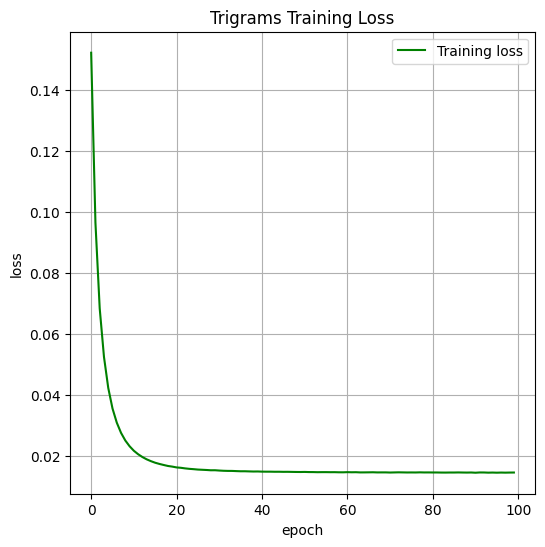

In [52]:
fix, ax = plt.subplots(figsize=(6, 6))

plt.plot(train_losses, color='green', label='Training loss')
plt.title('Trigrams Training Loss')
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend()
plt.grid(True)
plt.show()

### Получение векторов неизвестных слов. Инференс модели

Теперь, когда мы обучили модель, нам необходимо применить её для всех неизвестных слов, т.е. получить для них эмбеддинги.

Т.к. для этих слов у нас нет word2vec эмбеддингов, то dataset и collator для обучения не подходят для инференса. Необходимо реализовать датасет и коллатор для инференса по следующим шаблонам:

In [53]:
class InferenceTrigramDataset:

    def __init__(self, vocab, trigramTokenizer):
        """
            Датасет с неизвестными словами

            vocab: список слов
            tri_tokenizer: триграммный токенизатор
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.vocab = vocab
        self.trigramTokenizer = trigramTokenizer

    def __len__(self):
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return len(self.vocab)

    def __getitem__(self, idx):
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return self.trigramTokenizer(self.vocab[idx])


def inference_collate_fn(trigrams):
    """
        trigrams: список списков индексов триграмм

        returns: список индексов, список сдвигов триграмм
    """
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    inputs = []
    offsets = []
    for indices in trigrams:
        offsets.append(len(inputs))
        inputs.extend(indices)
    return torch.tensor(inputs), torch.tensor(offsets)

Теперь у нас есть всё необходимое, чтобы осуществить инференс. Не забудь перед инференсом перевести модель в режим эвала (**model.eval**), а также использовать контекстный менеджер **torch.no_grad**.

После инференса сформируйте словарь из известных в word2vec слов и их эмбеддингов, затем дополните его эмбеддингами для неизвестных слов, полученными после инференса.

In [54]:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

class Inferencer:
    def __init__(self, model):
        self.model = model


    @torch.no_grad()
    def __call__(self, dataloader, verbose=True):
        self.model.eval()
        embeddings = []

        for inputs, offsets in tqdm(dataloader, disable= not verbose):
            inputs, offsets = inputs.to(device), offsets.to(device)
            embeddings.append(self.model(inputs, offsets))

        return torch.vstack(embeddings)

In [55]:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
unknown_words_set = set()
for sample in tqdm(processed_validation):
    for text in sample:
        for word in text.split():
            if word not in wv_embeddings:
                unknown_words_set.add(word)
unknown_words = list(unknown_words_set)
print(len(unknown_words))

  0%|          | 0/3760 [00:00<?, ?it/s]

9527


In [56]:
val_ds = InferenceTrigramDataset(unknown_words, trigramTokenizer)
inference_dataloader = DataLoader(dataset=val_ds, batch_size=1024, shuffle=False, collate_fn=inference_collate_fn)

In [57]:
inferecer = Inferencer(model)

In [58]:
unknown_embeddings = inferecer(inference_dataloader)

  0%|          | 0/10 [00:00<?, ?it/s]

In [59]:
print(unknown_embeddings.shape)

torch.Size([9527, 300])


Используя **Scorer** и **Embedder**, получите новые значения метрик для валидации:

In [60]:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

wv_embeddings.add_vectors(unknown_words, unknown_embeddings.cpu().detach().numpy())

In [61]:
new_embedder = Embedder(wv_embeddings, dim=300)

In [62]:
scorer_new = Scorer(
    k=[1, 5, 10, 100, 500, 1000],
    embedder=new_embedder
)

updated_hits = scorer_new(processed_validation, verbose=True)

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [63]:
updated_hits[500]

0.9087765957446808

Одним из критериев получения полных баллов является значение метрики **hits@500** $\geqslant 0.89$.

## Часть 3. Обучение векторных представлений для целевой задачи. (4 баллов)

Предполагается, что в этой части используются TextPreprocessor, Embedder, Scorer из предыдущих частей.

Для обучения на целевую задачу нам понадобится обучающая выборка. Считайте её с диска, предобработайте текст вопросов

In [64]:
train = []
for questions in tqdm(read_corpus(BASE_PATH + 'train.tsv')):
    train.append([textPrepocessor(text) for text in questions])

  0%|          | 0/1000000 [00:00<?, ?it/s]

Необходимо создать **токенизатор для текста** - составить словарь и сделать маппинг из слов в индексы.

In [65]:
class TextTokenizer:

    def __init__(self, vocab):
        """
            vocab: множество слов, встретившихся в обучающей выборке
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.vocab = list(vocab)
        self.mapping = {self.vocab[i]: i for i in range(len(self.vocab))}

    @property
    def vocab_size(self):
        """
            returns: количество слов в словаре
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return len(self.vocab)

    def __call__(self, text):
        """
            text: текст

            returns: список индексов
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return [self.mapping[word] for word in text.split()]

Составление словаря и токенизатора

In [66]:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
train_vocab = set()
for sample in tqdm(train):
    for text in sample:
        for word in text.split():
            train_vocab.add(word)

textTokenizer = TextTokenizer(train_vocab)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [67]:
print(len(train_vocab))

131030


Нам также понадобится **новый датасет для обучения**. Для применения метода NT-Exent нам не нужно "майнить негативы", поэтому датасет надо сформировать как массив из пар-дубликатов.

Так как данные в обучающей выборке содержат множества дубликатов (т.е. все дубликаты сгруппированы в списки), есть несколько способов сформировать итоговый датасет:
1. Оставить из каждого множества дубликатов какие-нибудь случайные два (или просто первые два вопроса)
2. Для первого вопроса в множестве взять все остальные как дубликаты (N вопросов-дубликатов - N-1 пара). Тогда мы увидим каждый вопрос хотя бы один раз при обучении
3. Составить всевозможные уникальные пары-дубликаты из этих множеств (т.е. первый вопрос и все остальные вопросы, второй вопрос и все остальные, кроме первого).

Каждый следующий способ, начиная с первого, раздувает выборку по размеру, но возможно дает прирост к качеству решения задачи.

Реализуйте выбранный вами подход, используя предолженный шаблон:

In [68]:
train_pairs = []

for i in tqdm(range(len(train))):
    train_pairs.append(train[i][:2])

train_pairs = np.array(train_pairs)
print(train_pairs.shape)

unique_train_pairs = np.vstack(list({tuple(e) for e in train_pairs}))
print(f'The amount of unique train pairs: {unique_train_pairs.shape[0]}')

  0%|          | 0/1000000 [00:00<?, ?it/s]

(1000000, 2)
The amount of unique train pairs: 991366


In [69]:
lens = set()

for i in tqdm(range(len(train))):
    lens.add(len(train[i]))
print(lens)

  0%|          | 0/1000000 [00:00<?, ?it/s]

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 32, 39, 40, 43, 46, 95}


In [70]:
for sample in train:
    if len(sample) > 3:
        print(sample)
        break

['apache web server allow refresh localhost working fine', 'react router urls work refreshing writting manually', 'create multi page app without node react react router', 'tell webpack dev server serve index html route']


In [71]:
unique_firsts = set()
for i in range(len(train)):
    unique_firsts.add(train[i][0])
print(len(unique_firsts))

result_train_data = {unique_question: set() for unique_question in unique_firsts}

for sample in tqdm(train):
    for i in range(1, len(sample)):
        result_train_data[sample[0]].add(sample[i])
print(len(result_train_data))

780211


  0%|          | 0/1000000 [00:00<?, ?it/s]

780211


In [72]:
del train
del unique_firsts

In [73]:
question_pairs = []
for key, value in tqdm(result_train_data.items()):
    value_items = list(value)
    for v in value_items:
        if len(key) > 0 and len(value) > 0:
            question_pairs.append([key, v])

  0%|          | 0/780211 [00:00<?, ?it/s]

In [74]:
print(np.array(question_pairs))

[['one items invalid amazon mws xml feed'
  'amazon mws feed api issue updating order status']
 ['append remove anchor name current url without refresh'
  'use anchor target css seletor without rewrite url']
 ['using google api java client android post request seem authenticate google app engine app using oauth'
  'authenticating app engine android app federated login openid']
 ...
 ['convert arraylist array arrays' 'convert arraylist object object']
 ['youtube video still playing overlay closed' 'html5 video stop onclose']
 ['python version issue using types functiontype'
  'true dynamic anonymous functions possible python']]


In [75]:
class QuestionDuplicatesDataset(Dataset):

    def __init__(self, question_pairs, tokenizer):
        """
            question_pairs: список из пар вопросов-дубликатов
            tokenizer: объект класса TextTokenizer
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.question_pairs = question_pairs
        self.tokenizer = tokenizer

    def __len__(self):
        """
            returns: количество пар-дубликатов
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return len(self.question_pairs)

    def __getitem__(self, idx):
        """
            returns: (вопрос, дубликат), idx-ю пару в датасете
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        main = self.question_pairs[idx][0]
        duplicate = self.question_pairs[idx][1]
        return self.tokenizer(main), self.tokenizer(duplicate)

Также нужно подготовить **даталоадер** (а именно - коллатор для даталоадера) по аналогии со второй частью задания.

In [76]:
def get_ids_and_offsets(questions):
    """
        questions: список из токенизированных вопросов

        returns: (ids, offsets), где ids - вытянутый список индексов слов в вопросах из батча, offsets - сдвиги
    """
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    ids = []
    offsets = []
    for question in questions:
        offsets.append(len(ids))
        ids.extend(question)
    return torch.tensor(ids), torch.tensor(offsets)


def collate_fn(batch):
    """
        batch: список из пар токенизированных вопросов-дубликатов [(question, duplicate), ...]

        returns: (question_ids, question_offsets), (duplicate_ids, duplicate_offsets)
    """
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    questions = [sample[0] for sample in batch]
    duplicates = [sample[1] for sample in batch]
    return get_ids_and_offsets(questions), get_ids_and_offsets(duplicates)

Поделите выборку на трейн и валидацию, используя train_test_split, затем **создайте датасеты и даталоадеры** для обучения и валидации. Сколько пар-дубликатов получилось в датасете для обучения?

In [94]:
from sklearn.model_selection import train_test_split

train_questions, test_questions = train_test_split(question_pairs, train_size=0.75, random_state=42)
ds_train = QuestionDuplicatesDataset(train_questions, textTokenizer)
ds_test = QuestionDuplicatesDataset(test_questions, textTokenizer)

train_dataloader = DataLoader(dataset=ds_train, batch_size=256, collate_fn=collate_fn, shuffle=True)
test_dataloader = DataLoader(dataset=ds_test, batch_size=1024, collate_fn=collate_fn, shuffle=False)

С помощью предложенного шаблона **задайте модель** для преобразования вопросов в векторы.

In [245]:
from torch import nn


class DssmLikeModel(nn.Module):

    def __init__(self, num_embeddings, embedding_dim):
        """
            num_embeddings: количество слов, для которых обучаем эмбеддинги
            embedding_dim: размерность эмбеддинга
        """
        super().__init__()
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim
        self.model = nn.EmbeddingBag(num_embeddings, embedding_dim)

    def forward(self, ids, offsets):
        """
            ids: вытянутая посл-ть индексов слов вопросов, попавших в батч
            offsets: сдвиги для вопросов, попавших в батч

            returns: векторы вопросов
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        embeddings = self.model(ids, offsets)
        return embeddings

Создание модели

In [246]:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
new_model = DssmLikeModel(textTokenizer.vocab_size, wv_embeddings.vector_size)
new_model.to(device)
new_model

DssmLikeModel(
  (model): EmbeddingBag(131030, 300, mode='mean')
)

**Критерий оптимизации** для NTExentLoss выглядит как:

$$\mathcal{L}(Q, D) = -0.5 \log diag(softmax(QD^T / \alpha)) - 0.5 \log diag(softmax(DQ^T / \alpha)),$$

где:
* $Q \in \mathbb{R}^{b \times d}$ - эмбеддинги вопросов,
* $D \in \mathbb{R}^{b \times d}$ - эмбеддинги соответствующих вопросам дубликатов,
* $b$ - количество пар (вопрос, дубликат), $d$ - размерность эмбеддингов, $\alpha$ - гиперпараметр лосса.
* Softmax берется по рядам
* Матрицы $Q, D$ содержат нормированные эмбеддинги, т.е. считается именно косинус.

In [247]:
import torch.nn.functional as F


class NTExentLoss(nn.Module):

    def __init__(self, alpha=1., eps=1e-8):
        """
            alpha: коэффициент, на который мы делим скоры перед софтмаксом
            eps: ||v|| = min(eps, ||v||)
        """
        super().__init__()
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.alpha = alpha
        self.eps = eps

    def _normalize(self, embeddings):
        """
            embeddings: матрица размера [batch_size, embedding_dim]

            returns: матрица такого же размера, но с нормироваными векторами
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        normed_embeddings = embeddings / torch.clamp(torch.norm(embeddings, p=2, dim=1, keepdim=True), 
                                                      min=self.eps)
        return normed_embeddings

    def forward(self, embeddings, positives):
        """
            embeddings: матрица размера [batch_size, embedding_dim]
            positives: матрица такого же размера, с позитивами для векторов из матрицы embeddings

            returns: NT-Exent loss
        """
        embeddings_norm = self._normalize(embeddings)
        positives_norm = self._normalize(positives)
        
        logits_QD = torch.matmul(embeddings_norm, positives_norm.T) / self.alpha
        logits_DQ = torch.matmul(positives_norm, embeddings_norm.T) / self.alpha
        
        logits_QD -= torch.max(logits_QD, dim=1, keepdim=True).values
        logits_DQ -= torch.max(logits_DQ, dim=1, keepdim=True).values

        diag_QD = torch.diag(F.softmax(logits_QD, dim=1))
        diag_DQ = torch.diag(F.softmax(logits_DQ, dim=1))
        
        loss_QD = -0.5 * torch.log(diag_QD + self.eps)
        loss_DQ = -0.5 * torch.log(diag_DQ + self.eps)
        
        return torch.mean(loss_QD + loss_DQ)

**Создайте пайплайн** для обучения и валидации, используя предложенный шаблон.

Залогируйте с помощью **torch.utils.tensorboard.SummaryWriter** две величины:
1. Лосс для каждого батча
2. Лосс на валидации для каждой эпохи

In [248]:
import time
import shutil
import os
import torch

from torch.utils.tensorboard import SummaryWriter


class Trainer:

    def __init__(
            self,
            model,
            optimizer,
            criterion,
            logdir=None,
            device=None
    ):
        """
            model: объект класса DssmModel
            optimizer: оптимизатор
            criterion: критерий оптимизации
            logdir: директория, в которую SummaryWriter должен писать логи
            device: девайс (cpu или cuda), на котором надо производить вычисления
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.logdir = logdir
        self.device = device

        self.model.to(self.device)
        self.model.train()
        self._writer = SummaryWriter(log_dir=logdir) if logdir else None
        self._n_epoch = 0

    def _calculate_loss(self, batch):
        """
            batch: батч из индексов и сдвигов для вопросов и их дубликатов

            returns: посчитанный для батча лосс
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        questions_ids, q_offs,  = batch[0][0].to(self.device), batch[0][1].to(self.device)
        duplicates_ids, dup_offs = batch[1][0].to(self.device), batch[1][1].to(self.device)
        q_embeddings = self.model(questions_ids, q_offs)
        d_embeddings = self.model(duplicates_ids, dup_offs)
        return self.criterion(q_embeddings, d_embeddings)

    def _train_step(self, dataloader):
        """
            dataloader: даталоадер для обучения

            returns: лосс на датасете для обучения
        """
        self.model.train()
        loss = 0.0
        for batch in tqdm(dataloader):
            self.optimizer.zero_grad()
            loss_batch = self._calculate_loss(batch)
            loss += loss_batch.item()
            loss_batch.backward()
            self.optimizer.step()
        return loss / len(dataloader)

    @torch.no_grad()
    def _eval_step(self, dataloader):
        """
            dataloader: даталоадер для валидации

            returns: лосс на валидации
        """
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        self.model.eval()
        loss = 0.0
        for batch in dataloader:
            loss += self._calculate_loss(batch).item()

        return loss / len(dataloader)


    def train(self, dataloaders, n_epochs, verbose=False):
        """
            dataloaders: словарь вида {'train': train_dataloader, 'eval': eval_dataloader}
            n_epochs: количество эпох обучения
            verbose: нужно ли выводить каждую эпоху информацию про лоссы
        """
        self._n_epoch = n_epochs
        start = time.time()
        for epoch in tqdm(range(n_epochs), disable=not verbose):
            train_loss = self._train_step(dataloaders['train'])

            eval_loss = self._eval_step(dataloaders['eval'])
            if self._writer is not None:
                self._writer.add_scalar('eval/loss', eval_loss, global_step=self._n_epoch)

            if verbose:
                print(
                    'epoch: {:>2}, train loss: {:.4f}, eval loss: {:.4f}, time: {:.4f}' \
                        .format(epoch + 1, train_loss, eval_loss, time.time() - start)
                )

            self._n_epoch += 1

Предлагается использовать для оптимизации Адам и обучать модель 10-60 эпох.

Для этой части задания GPU даёт существенное ускорение при обучении, поэтому стоит по возможности делать обучение с большим batch size'ом и на GPU.

In [249]:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
optimizer = torch.optim.Adam(new_model.parameters(), lr=0.01)
criterion = NTExentLoss()
trainer = Trainer(new_model, optimizer, criterion, logdir='./model1', device=device)
dataloaders = {'train': train_dataloader, 'eval': test_dataloader}
n_epochs = 25

In [250]:
trainer.train(dataloaders, n_epochs, verbose=True)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/3623 [00:00<?, ?it/s]

epoch:  1, train loss: 4.9376, eval loss: 6.2278, time: 36.7474


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch:  2, train loss: 4.8207, eval loss: 6.2059, time: 73.3594


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch:  3, train loss: 4.8014, eval loss: 6.1993, time: 110.0770


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch:  4, train loss: 4.7921, eval loss: 6.1963, time: 148.1700


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch:  5, train loss: 4.7867, eval loss: 6.1948, time: 184.8084


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch:  6, train loss: 4.7830, eval loss: 6.1939, time: 221.4636


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch:  7, train loss: 4.7803, eval loss: 6.1931, time: 258.0763


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch:  8, train loss: 4.7783, eval loss: 6.1928, time: 294.8329


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch:  9, train loss: 4.7768, eval loss: 6.1926, time: 331.5236


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 10, train loss: 4.7756, eval loss: 6.1922, time: 368.1718


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 11, train loss: 4.7746, eval loss: 6.1922, time: 404.8016


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 12, train loss: 4.7738, eval loss: 6.1921, time: 441.4769


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 13, train loss: 4.7730, eval loss: 6.1922, time: 478.0472


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 14, train loss: 4.7724, eval loss: 6.1919, time: 515.9830


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 15, train loss: 4.7719, eval loss: 6.1918, time: 552.7082


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 16, train loss: 4.7713, eval loss: 6.1920, time: 589.2765


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 17, train loss: 4.7709, eval loss: 6.1918, time: 625.9322


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 18, train loss: 4.7705, eval loss: 6.1918, time: 662.6141


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 19, train loss: 4.7701, eval loss: 6.1919, time: 699.1843


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 20, train loss: 4.7698, eval loss: 6.1917, time: 735.7965


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 21, train loss: 4.7695, eval loss: 6.1918, time: 772.5755


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 22, train loss: 4.7693, eval loss: 6.1916, time: 810.3627


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 23, train loss: 4.7689, eval loss: 6.1916, time: 847.0308


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 24, train loss: 4.7687, eval loss: 6.1916, time: 883.7569


  0%|          | 0/3623 [00:00<?, ?it/s]

epoch: 25, train loss: 4.7685, eval loss: 6.1917, time: 920.3333


Осталось достать из модели обученные под задачу векторы слов, составить маппинг слов в векторы, создать **Embedder** и **Scorer** и провалидировать качество на нашей исходной валидации, которой мы пользовались в первых двух частях.

Чтобы достать из модели веса, можно использовать `model._embeddings.weight.cpu().detach().numpy()`

In [253]:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
embeddings = new_model.model.weight.cpu().detach().numpy()
index_to_word = {index: word for word, index in textTokenizer.mapping.items()}
word_to_vector = {index_to_word[i]: embeddings[i] for i in range(embeddings.shape[0])}

In [262]:
last_embedder = Embedder(word_to_vector, dim=300)

last_scorer = Scorer(
    k=[1, 5, 10, 100, 500, 1000],
    embedder=last_embedder
)

updated_hits = last_scorer(processed_validation, verbose=True)

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [267]:
updated_hits[500]

0.9882978723404255

Одним из критериев получения полных баллов является значение метрики **hits@500** $\geqslant 0.98$.

## Дополнительная часть (до 3 баллов)

Каждый из пунктов при успешном выполнении гарантирует как минимум один дополнительный балл. Максимум вам будет зачтено три пункта.
1. Обучить триграммную модель на косинусную близость вместо евклидового расстояния, получить прирост качества (относительно триграммной модели с MSE)
2. Обучить в качестве триграммной модели char-biLSTM вместо мешка векторов триграмм, получить прирост качества (относительно триграммной модели с таким же критерием оптимизации)
3. Усложнить модель в части 3, добавить к мешку вектора словесных униграмм также мешок векторов словесных биграмм и мешок векторов буквенных триграмм (сделать модель более похожей на настоящий dssm), получить прирост качества
4. Модифицировать модель в части 3 произвольным образом (добавить MLP, нормализации, дропаут, сделать bilstm поверх последовательности векторов слов, трансформер и т.д.), получить прирост качества
5. Сделать модель с ранним связыванием (early fusion) - векторы вопросов конкатенируются и проходят через MLP (с возможными модификациями) перед созданием предсказания. Hint: возможно стоит предобучить эмбеддинги слов с помощью NT-Exent перед обучением финальной модели.